# RUN5: 2018-05-27 UT Preliminary Analysis

In [67]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from imaka.analysis import plot_stats
from astropy.table import Table
import numpy as np
from importlib import reload
from imaka.reduce.nights import reduce_2018_05_27 as redu

reload(redu)
reload(plot_stats)

#root_dir = "/Volumes/DATA5/imaka/20180527/FLI/"
root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN7/20180527/FLI/"
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Reduction

Fully reduce the data from 20180526 UT. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga.


In [6]:
"""Set the appropriate root directory for your machine"""
#redu.root_dir = root_dir

""""Make sky and flat images and use them to reduce science images"""
#redu.make_sky()
#redu.make_flat()  # Manually copy over flat from 20180525/
#redu.reduce_FLD2()

""""Find stars in clean images and calculate stats"""
#redu.find_stars_FLD2()
#redu.calc_star_stats()

""""Make a stack of images for each mode and analyze stacks"""
#redu.stack_FLD2()
#redu.analyze_stacks()

'"Make a stack of images for each mode and analyze stacks'

# Generate Plots

# FWHM and Seeing

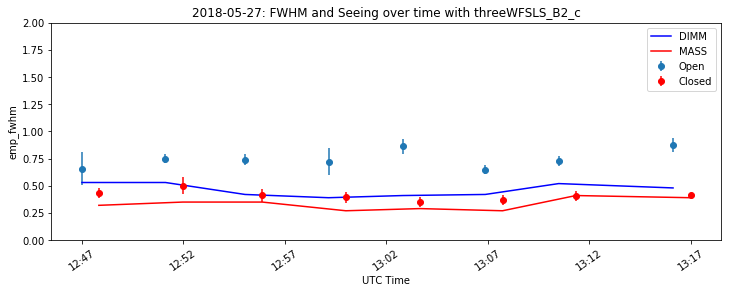

In [8]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_closed_threeWFSLS_B2_c_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-05-27: FWHM and Seeing over time with threeWFSLS_B2_c", plots_dir)

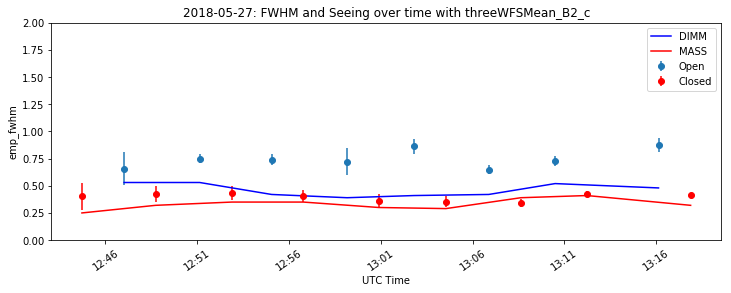

In [9]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_closed_threeWFSMean_B2_c_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2018-05-27: FWHM and Seeing over time with threeWFSMean_B2_c", plots_dir)

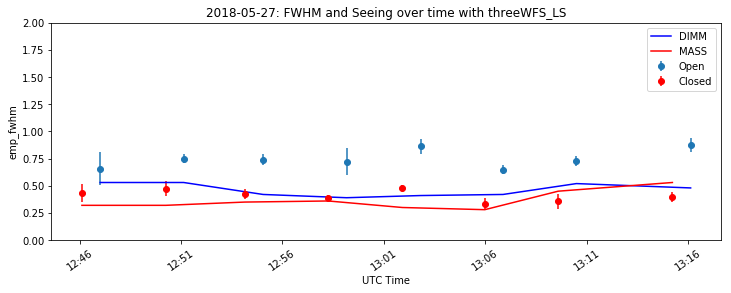

In [10]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file3 = stats_dir+ "stats_closed_threeWFS_LS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file3, 'emp_fwhm', "2018-05-27: FWHM and Seeing over time with threeWFS_LS", plots_dir)

# PSF Comparisons

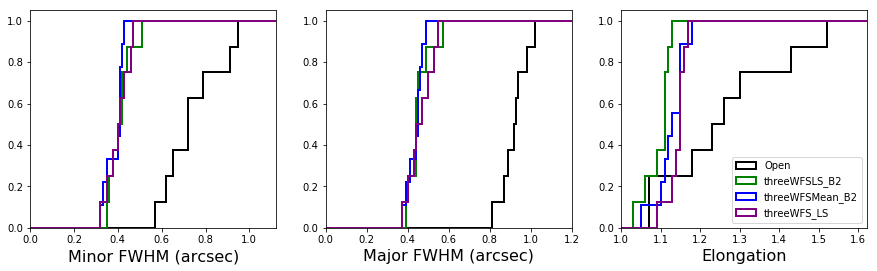

In [11]:
files = [open_file, closed_file1, closed_file2, closed_file3]
labels = ['Open', 'threeWFSLS_B2', 'threeWFSMean_B2', 'threeWFS_LS']
colors = ['k', 'g', 'b', 'purple']
plot_stats.comp_cdf(files, labels, colors)

# PSF Variability over Field of View

Right panel shows the FWHM of sources asa function of position on image.  Sources on right have outliers removed by sigma clipping, with both the original and clipped data sets shown on the left panel.

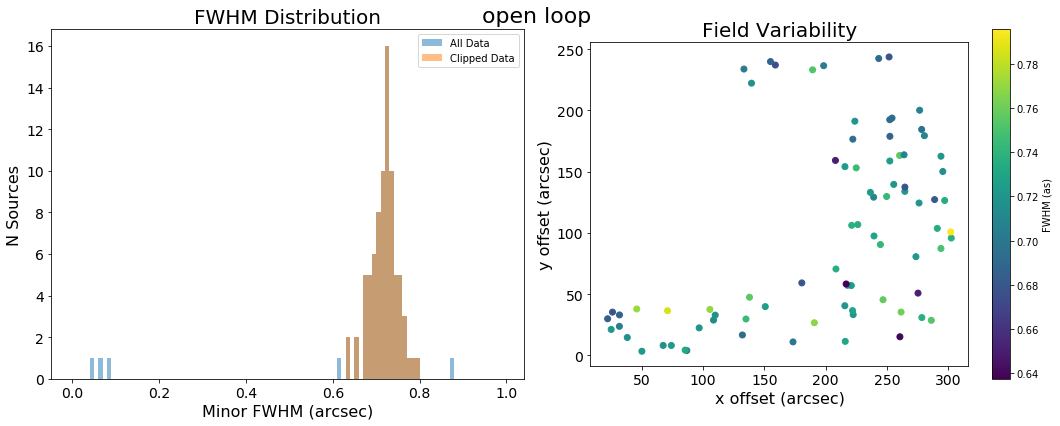

In [73]:
img_file = stack_dir + "FLD2_stack_open.fits"
starlist = stack_dir + "FLD2_stack_open_stars.txt"
plot_stats.plot_var(img_file, starlist, "open loop")

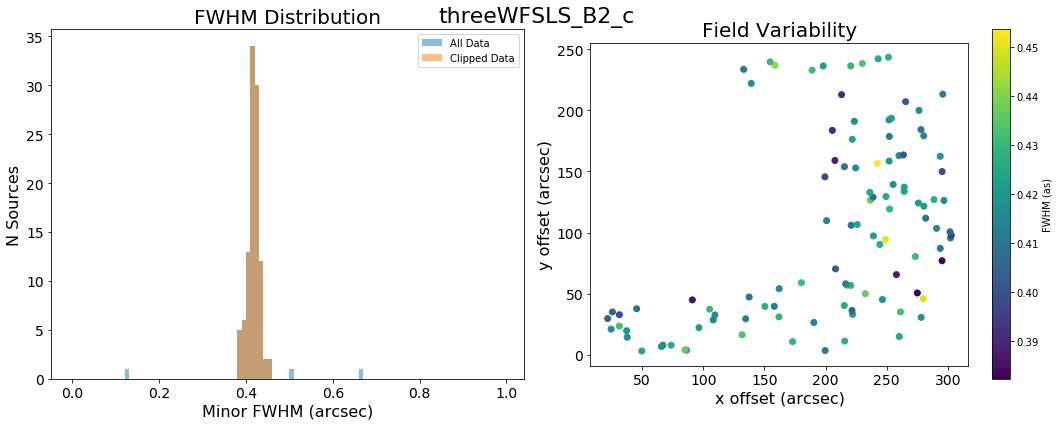

In [68]:
img_file = stack_dir + "FLD2_stack_threeWFSLS_B2_c.fits"
starlist = stack_dir + "FLD2_stack_threeWFSLS_B2_c_stars.txt"
plot_stats.plot_var(img_file, starlist, "threeWFSLS_B2_c")

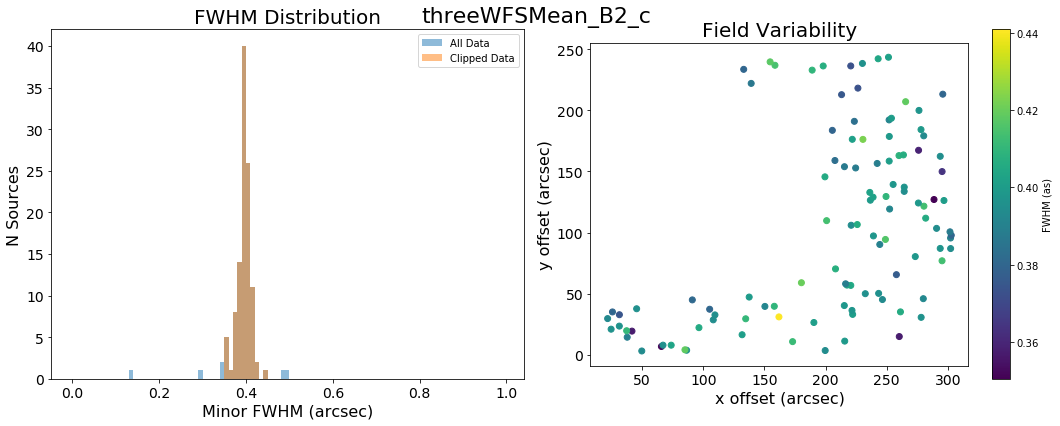

In [69]:
img_file = stack_dir + "FLD2_stack_threeWFSMean_B2_c.fits"
starlist = stack_dir + "FLD2_stack_threeWFSMean_B2_c_stars.txt"
plot_stats.plot_var(img_file, starlist, "threeWFSMean_B2_c")

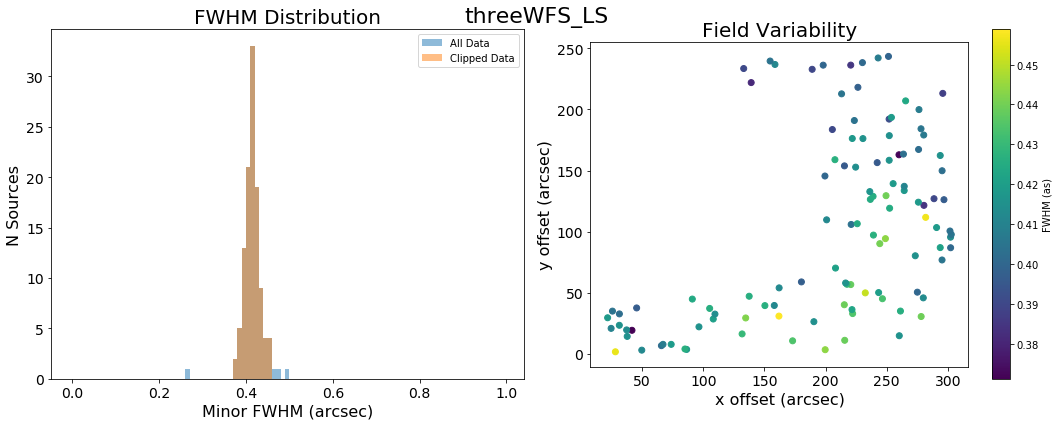

In [70]:
img_file = stack_dir + "FLD2_stack_threeWFS_LS.fits"
starlist = stack_dir + "FLD2_stack_threeWFSMean_B2_c_stars.txt"
plot_stats.plot_var(img_file, starlist, "threeWFS_LS")